Nguyen Thanh Kiet - 1712546

# Lấy dữ liệu

## Chủ đề và nguồn dữ liệu

Dữ liệu được dùng trong đồ án là file 'suicide.csv' đính kèm, đâu là dữ liệu về trường hợp tử tự của một số nước trên thế giới trong khoảng thời gian từ năm 1985 đến năm 2016. Dữ liệu này được public ở trên kaggle.com, một trang web chia sẻ dữ liệu và trao đổi kiến thức về các lĩnh vực như Data Science, Machine Learning,... với mục đích là để tìm ra những thông tin hữu ích giúp ngăn ngừa tình trạng tự sát trên toàn cầu.

## Giấy phép của dữ liệu

Dữ liệu này có license là CC By 4.0, do đó dữ liệu này thể sử dụng dữ liệu này phục vụ cho mục đích học tập.

## Cách thu thập dữ liệu

Dữ liệu được thu thập và tổng hợp theo thời gian và địa điểm, từ 3 nguồn dữ liệu khác nhau:
- Chương trình phát triển Liên hiệp quốc, chỉ số phát triển con người (HDI) (2018): http://hdr.undp.org/en/indicators/137506
- Ngân hàng thế giới World Bank với chỉ số GDP của các nước từ năm 1985 đến 2016 (2018): https://databank.worldbank.org/source/world-development-indicators
- Mục phòng chống tự tử của Tổ chức y tế thế giới WHO (2018): https://www.who.int/health-topics/suicide#tab=tab_1


# Khám phá dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('suicide.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,Europe


## Dữ liệu gồm có bao nhiêu dòng? Bao nhiêu cột?

In [3]:
data.shape

(27820, 13)

Dữ liệu này gồm có 27820 dòng và 13 cột

## Mỗi dòng và mỗi cột có ý nghĩa gì?

Mỗi cột của dữ liệu có ý nghĩa như sau:
- **country**: quốc gia
- **year**: năm xảy ra vụ tự sát
- **sex**: giới tính của người tự sát
- **age**: nhóm độ tuổi của người tự sát
- **suicides_no**: số lượng vụ tự sát (phân theo nhóm tuổi, giới tính, thế hệ)
- **population**: số lượng người dân phân theo nhóm tuổi, giới tính, thế hệ
- **suicides/100k pop**: số vụ tự sát mỗi 100 nghìn người (được tính từ cột suicides_no và population)
- **country-year**: được ghép từ cột country và cột year
- **HDI for year**: chỉ số phát triển con người (Human development index) của quốc gia trong một năm cụ thể
- **gdp_for_year**: GDP của quốc gia trong một năm cụ thể
- **gdp_per_capita**: GDP trên đầu người của quốc gia
- **generation**: Nhóm thế hệ người, (vd: Silent: Thế hệ im lặng, sinh năm 1925 - 1945)
- **continent**: Châu lục của quốc gia này trực thuộc

Từ quan sát ở biến 'data', thì mỗi dòng của dữ liệu đại diện cho một nhóm người (phân theo độ tuổi, quốc gia, giới tính,...)

## Mỗi cột có dtype là gì?

In [4]:
data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year ($)        int64
gdp_per_capita ($)      int64
generation             object
continent              object
dtype: object

### Kiểm tra các cột có dtype là object

In [5]:
obj_columns = data.dtypes.index[data.dtypes == 'object']
obj_columns

Index(['country', 'sex', 'age', 'country-year', 'generation', 'continent'], dtype='object')

#### Kiểm tra xem trong các cột dữ liệu này có bị thiếu dữ liệu hay không?

In [6]:
data.loc[:, obj_columns].isnull().any()

country         False
sex             False
age             False
country-year    False
generation      False
continent       False
dtype: bool

#### Miền giá trị, số unique value của mỗi cột categorical

Số lượng quốc gia được đề cập trong dữ liệu

In [7]:
data['country'].nunique()

101

In [8]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
data['country-year'].nunique()

2321

In [10]:
data['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [11]:
data['continent'].unique()

array(['Europe', 'Americas', 'Asia', 'Oceania', 'Africa',
       'Republic of Korea'], dtype=object)

In [12]:
idx = data['continent'] == 'Republic of Korea'
data[idx]['country'].unique()

array(['Republic of Korea'], dtype=object)

#### Nhận xét

- Có 101 quốc gia, từ năm 1985 đến 2016 là 32 năm, nếu như mỗi quốc gia đều có dữ liệu từ 1985 đến 2016 thì cột này phải có 3232 unique value, trên thực tế nó chỉ có 2321 cho nên có thể có một số quốc gia chỉ có dữ liệu của vài năm
- Cột 'continent' có một dữ liệu ngoại lệ là 'Republic of Korea' tương ứng với quốc gia Hàn Quốc, có thể trong quá trình thu thập dữ liệu, thì giá trị của cột 'continent' được tính từ cột 'country' thông qua hàm countrycode(), và hàm này thì không trả về 'Asia' cho gía trị 'Republic of Korea'. Vì chỉ có một quốc gia gặp phải trường hợp này nên ta chỉ đơn giản sửa lại 'continent' là 'Asian'
- Các cột có dtype = object đều là dữ liệu dạng categorical

### Kiểm tra các dữ liệu số

In [13]:
numeric_columns = data.dtypes.index[data.dtypes != 'object']
numeric_columns

Index(['year', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_for_year ($)', 'gdp_per_capita ($)'],
      dtype='object')

#### Kiểm tra dữ liệu missing

In [14]:
data.loc[:, numeric_columns].isnull().any()

year                  False
suicides_no           False
population            False
suicides/100k pop     False
HDI for year           True
gdp_for_year ($)      False
gdp_per_capita ($)    False
dtype: bool

Có bao nhiêu % dữ liệu bị missing trong cột 'HDI for year'

In [15]:
np.sum(data['HDI for year'].isnull()) / data.shape[0]

0.699352983465133

#### Miền giá trị của các cột dữ liệu số

In [16]:
col_ranges_df = data.loc[:, numeric_columns].agg(['min', 'max'])
col_ranges_df

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
min,1985,0,278,0.00,0.483,46919625,251
max,2016,22338,43805214,224.97,0.944,18120714000000,126352


#### Nhận xét

- Các cột dữ liệu số phần lớn không có dữ liệu missing, chỉ có duy nhất một cột 'HDI for year' bị mất và dữ liệu bị thiếu tới 70%. Dựa trên quan sát từ 'data' thì rất khó để biết được lý do dữ liệu tại cột này bị mất, thông tin cột này cũng không quá hữu ích nên ta có thể bỏ nó đi
- Dữ liệu cột 'gdp_for_year ($)' có giá trị rất lớn ta có thể cân nhắc scale giá trị về một khoảng phù hợp

## Tiếp tục khám phá dữ liệu

Như đã đề cập trong phần kiểm tra dữ liệu dtype = object, có thể có một số quốc gia không có đầy đủ dữ liệu từ năm 1985 đến 2020. Nên ta thử kiểm tra xem mỗi quốc gia có dữ liệu trong bao nhiêu năm?

In [17]:
prov_yrs_per_country = data.groupby('country')['year'].nunique()
# Số nước có cung cấp dữ liệu theo năm nhỏ hơn 3
prov_yrs_per_country[prov_yrs_per_country <= 3]

country
Bosnia and Herzegovina    2
Cabo Verde                1
Dominica                  1
Macau                     1
Mongolia                  1
Oman                      3
Saint Kitts and Nevis     3
San Marino                3
Name: year, dtype: int64

Ngược lại ta cũng kiểm tra xem các năm 

## Tiền xử lý

### Sửa giá trị cột 'continent' của 'Republic of Korea'

In [18]:
data.loc[idx, 'continent'] = 'Asia'
data['continent'].unique()

array(['Europe', 'Americas', 'Asia', 'Oceania', 'Africa'], dtype=object)

### Xóa cột 'HDI for year'

In [19]:
data = data.drop('HDI for year', axis=1)
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X,Europe


# Đưa ra câu hỏi cần trả lời

Sau khi khám phá và tìm hiểu dữ liệu, có một số câu hỏi có thể trả lời từ dữ liệu như sau:
- Số lượng các vụ tự sát thay đổi như thế nào theo từng năm (cho toàn thế giới và cho từng châu lục)?
- Đối tượng nào có tỉ lệ tự sát cao nhất, thấp nhất (theo độ tuổi, giới tính)?
- Châu lục nào có nhiều vụ tự sát nhất?
- Các quốc gia càng giàu (gdp trên đầu người cao) thì tỉ lệ tự sát có ít hơn hay không?
- Các quốc gia nào có tỉ lệ tự sát ngày càng tăng dần trong 20 năm gần đây?

Nhìn chung trả lời các câu hỏi này đều hướng đến một mục đích: ngăn chặn tình trạng tự sát. Vì mỗi người có điều kiện sống, tư duy, suy nghĩ, cảm xúc khác nhau theo thời gian, độ tuổi, giới tính,.... Việc nắm bắt được những yếu tố khác nhau đó tác động như thế nào đến người có ý định tự sát sẽ giúp chúng ta hiểu họ hơn nhằm đưa ra những phương án giúp đỡ họ. 

## Số lượng các vụ tự sát thay đổi như thế nào theo từng năm

### Ý nghĩa

Việc nắm bắt được số lượng vụ tự sát theo từng năm có thể phần nào đó giúp ích cho những người hoạt động cho những tổ chức phòng chống tự sát biết được rằng các chiến lược của những tổ chức này đưa ra để hạn chế và ngăn chặn có đạt hiệu quả hay không. ...

### Tiền xử lý

Như đã đề cập ở phần khám phá dữ liệu, có khả năng một số năm có ít số quốc gia cung cấp dữ liệu về số người tự sát tại các quốc gia này. Nếu như có trường hợp đó thì sẽ dẫn đến tổng số lượng vụ tự sát trong một năm sẽ ít hơn rất nhiều so với các năm còn lại. Điều này nếu như không được xử lý sẽ dễ khiến người nhìn vào biểu đồ có những phán đoán, nhìn nhận sai về những gì dữ liệu thực sự muốn thể hiện

Tiền xử lý dữ liệu cho câu hỏi này gồm những bước sau:
- Bước 1: Liệt kê số quốc gia đóng góp dữ liệu theo từng năm và lưu vào biến 'ncountries_prov_by_years'
- Bước 2: Loại bỏ (nếu có) những năm có quá ít quốc gia đóng góp dữ liệu

#### Liệt kê số quốc gia đóng góp dữ liệu theo từng năm

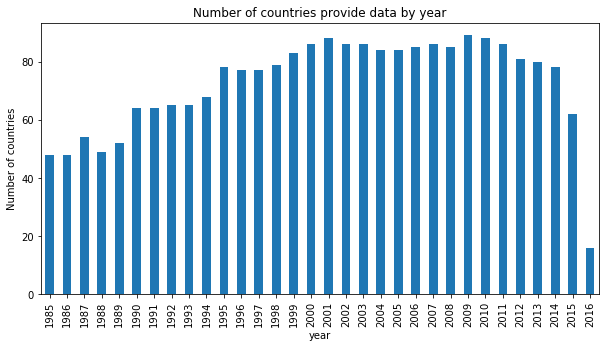

In [20]:
ncountries_prov_by_years = data.groupby('year')['country'].nunique()
ax = ncountries_prov_by_years.plot.bar(figsize=(10, 5))
ax.set_ylabel('Number of countries')
ax.set_title('Number of countries provide data by year');

#### Loại bỏ năm 2016

Ta thấy rằng trong những năm đầu tiên thu thập dữ liệu thì số quốc gia cung cấp dữ liệu cũng ít hơn một chút so với các năm sau này. Tuy nhiên năm 2016 (năm gần nhất) lại có rất ít quốc gia đóng góp dữ liệu (nhỏ hơn 20). Nguyên nhân các tổ chức tổng hợp lại dữ liệu vẫn chưa thu thập đủ dữ liệu trong năm gần nhất. Dù gì thì ta cũng nên loại bỏ các dòng có liên quan đến năm 2016 để giữ tính tổng quát cho dữ liệu

In [21]:
# Xóa đi các dòng có năm là 2016
data = data[data['year'] != 2016]

# Kiểm tra lại 
np.isin(data['year'], 2016).any()

False

In [22]:
# Số dòng sau khi xóa
data.shape

(27660, 12)

### Phân tích và trả lời câu hỏi

- Bước 1: Tính tổng số lượng vụ tự sát và tổng số dân theo từng năm và lưu vào 'total_suicides_each_year' với index là năm, 2 cột là 'total suicides', 'total pop'
- Bước 2: Từ 'total_suicides_each_year' , tính ra số lượng vụ tự sát / 100K người dân bằng cách lấy cột 'total suicides' x 100000 / 'total pop', sau đó lưu vào 1 series 'suicide_rate_each_year' với index là năm
- Bước 3: Trực quan hóa dữ liệu bằng line plot

#### Tính tổng số lượng vụ tự sát và tổng số dân theo từng năm và lưu vào 'total_suicides_each_year'

In [23]:
# Các cột liên quan đến tác vụ
var = ['year', 'suicides_no', 'population']
total_suicides_each_year = data.loc[:, var].groupby('year').sum()
total_suicides_each_year.rename(columns={'suicides_no':'total suicides', 'population'
                                         :'total pop'}, inplace=True)
total_suicides_each_year.head(3)

,total suicides,total pop
year,,
1985,116063,1008600086
1986,120670,1029909613
1987,126842,1095029726


#### Tính 'suicide_rate_each_year'

In [24]:
suicide_rate_each_year = total_suicides_each_year['total suicides'] * 10**5 / total_suicides_each_year['total pop']

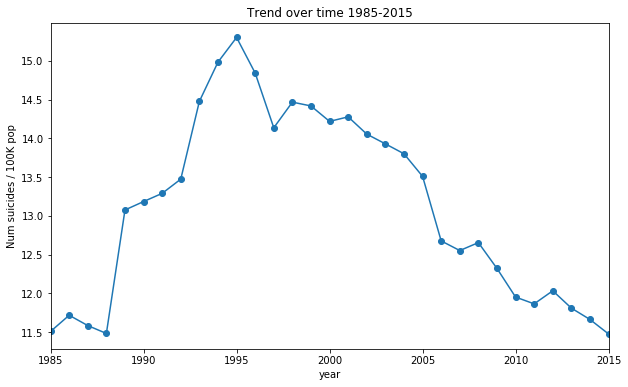

In [25]:
ax = suicide_rate_each_year.plot.line(figsize=(10, 6), marker='o')
ax.set_ylabel('Num suicides / 100K pop')
ax.set_title('Trend over time 1985-2015');

### Nhận xét:

- Tỉ lệ tự sát tăng trong giai đoạn 1985-1995, tỉ lệ đạt đỉnh vào năm 1995
- Tỉ lệ tự sát giảm trong giai đoạn 1995-2015

Dựa vào kết quả thu được từ biểu đồ, ta có thể thấy các chiến dịch phòng chống tự sát hoặc sự phát triển của ngành tâm lý học đã giúp cho tỉ lệ vụ tự sát giảm dần theo từng năm 

## Đối tượng nào có tỉ lệ tự sát cao nhất, thấp nhất (theo độ tuổi, giới tính)

### Phân tích và trả lời câu hỏi

Thay vì sử dụng hàm max, min để có được câu trả lời, ta có thể hiện tỉ lệ tự sát bằng biểu đồ cột theo độ tuổi và giới tính nhằm tìm thêm thông tin về xu hướng của mỗi nhóm đối tượng. Biểu đồ cột sẽ có trục hoành theo độ tuổi, trục tung là tỉ lệ tự sát, mỗi cột sẽ có tỉ trọng về giới tính

- **Bước 1**: Tính tổng số lượng vụ tự sát và tổng số dân theo từng độ tuổi giới tính và lưu vào 'tot_sui_by_ages' với index mặc định 4 cột là 'age', 'sex','tot sui', 'tot pop'
- **Bước 2**: Tính tỉ lệ tự sát của mỗi giới tính và lưu vào dataframe 'sui_rate_by_ages' bằng cách:
    - Bước 2.1: Transform cột 'total pop' thành tổng pop của female và male trong một độ tuổi
    - Bước 2.2: Lấy cột 'tot sui' x 10^5 / 'tot pop' và gán vào dataframe 'sui_rate_by_ages'
- **Bước 3**: Trực quan hóa bằng stacked bar char, với legend là giới tính

#### Bước 1

In [26]:
var = ['age', 'sex', 'suicides_no', 'population']
tot_sui_by_ages = data.loc[:, var].groupby(['age', 'sex']).sum()
tot_sui_by_ages.rename(columns={'suicides_no':'tot sui', 'population':'tot pop'}, inplace=True)
tot_sui_by_ages = tot_sui_by_ages.reset_index()
tot_sui_by_ages.head(3)

,age,sex,tot sui,tot pop
0,15-24 years,female,175199,4235352894
1,15-24 years,male,632148,4387297664
2,25-34 years,female,208450,4179617213


#### Bước 2

In [27]:
new_pop = tot_sui_by_ages.groupby('age')['tot pop'].transform(lambda x: np.sum(x))
tot_sui_by_ages['tot pop'] = new_pop
tot_sui_by_ages.head(3)

,age,sex,tot sui,tot pop
0,15-24 years,female,175199,8622650558
1,15-24 years,male,632148,8622650558
2,25-34 years,female,208450,8415461883


In [28]:
sui_rate_by_ages = tot_sui_by_ages.loc[:, ['age', 'sex']]
sui_rate_by_ages['sui per 100K'] = tot_sui_by_ages['tot sui'] / tot_sui_by_ages['tot pop']
sui_rate_by_ages['sui per 100K'] *= 10 **5
sui_rate_by_ages.head(3)

,age,sex,sui per 100K
0,15-24 years,female,2.031846
1,15-24 years,male,7.331249
2,25-34 years,female,2.476988


#### Bước 3

In [29]:
# Đưa dataframe về dạng multi index với index dòng 'age' và column là tỉ lệ tự sát theo giới tính
sui_rate_by_ages = sui_rate_by_ages.set_index(['age', 'sex']).unstack()
sui_rate_by_ages

sui per 100K           
sex               female       male
age                                
15-24 years     2.031846   7.331249
25-34 years     2.476988  10.853736
35-54 years     3.524433  13.548969
5-14 years      0.202377   0.419911
55-74 years     4.890083  13.964070
75+ years       8.345226  16.198088

In [30]:
# Tạo một cột tạm để lưu tổng tỉ lệ tự sát của 2 giới tính
sui_rate_by_ages = sui_rate_by_ages.assign(tmp=sui_rate_by_ages.sum(axis=1))

# Sắp xếp các dòng theo tổng tỉ lệ tự sát
sui_rate_by_ages.sort_values('tmp', inplace=True)

# Xóa cột tạm 'tmp' đi
sui_rate_by_ages.drop('tmp', axis=1, inplace=True)

# Bỏ đi 1 level của column index
sui_rate_by_ages.columns = sui_rate_by_ages.columns.droplevel()
sui_rate_by_ages

sex,female,male
age,,
5-14 years,0.202377,0.419911
15-24 years,2.031846,7.331249
25-34 years,2.476988,10.853736
35-54 years,3.524433,13.548969
55-74 years,4.890083,13.964070
75+ years,8.345226,16.198088


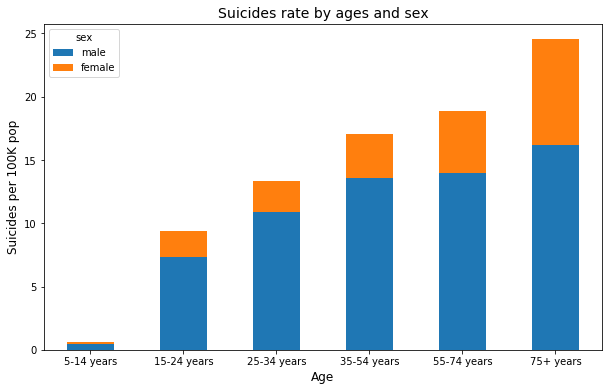

In [31]:
# Trực quan hóa bằng stacked bar chart
ax = sui_rate_by_ages.plot(kind='bar', figsize=(10, 6), 
                           y=['male', 'female'], rot=0, stacked=True)
ax.set_ylabel('Suicides per 100K pop', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_title('Suicides rate by ages and sex', fontsize=14);

### Nhận xét:

- Độ tuổi 5-14 có tỉ lệ tự sát nhỏ nhất
- Độ tuổi 75+, người già có tỉ lệ tự sát cao nhất
- Tỉ lệ tự sát tăng dần theo từng lứa tuổi
- Ở mỗi độ tuổi thì tỉ lệ đàn ông luôn chiếm phần lớn

Từ kết quả trên ta có thể suy đoán được những thông tin như sau:
-  Độ tuổi trẻ con có tỉ lệ tự sát nhỏ nhất, điều này cũng dễ hiểu vì độ tuổi này là độ tuổi trẻ em nên nhận thức không giống như người lớn, chúng hồn nhiên ngây thơ hơn nên rất hiếm những trẻ có ý định ghê gớm như tự sát.
- Độ tuổi cao thì tỉ lệ tự sát càng cao, và ở độ tuổi cao nhất (trên 75 tuổi) có tỉ lệ tự sát cao nhất. Điều này có thể là do người càng già, càng sống lâu càng cảm thấy cô đơn (vợ/chồng, người thân, bạn bè mất; con cái không quan tâm chăm sóc,...). Cộng thêm với việc không còn khả năng lao động, mất đi động lực sống dẫn tới hậu quả trầm trọng về tâm lý.
- Từ dữ liệu, đàn ông chiếm phần lớn tỉ lệ tự sát ở mỗi độ tuổi cũng là kết quả khá bất ngờ, khi mà phái nữ thông thường có tâm lý bất ổn hơn phái nam, nên theo suy đoán ban đầu thì phụ nữ có thể sẽ có những tổn thương về tâm lý sâu sắc hơn, dẫn tới việc nghĩ quẩn nhiều hơn người nam. Tuy nhiên số liệu thu được hoàn toàn ngược lại, tại sao lại có chuyện như vậy? Nhiều nghiên cứu cho thấy nguyên nhân phần lớn là do vai trò của 2 phái trong xã hội khác nhau, và phái nam thường có vai trò áp lực và nặng nề hơn trong xã hội. Gánh nặng về kinh tế, áp lực chăm lo cho gia đình lớn hơn nhiều so với phụ nữ. Đồng thời, theo các chuyên gia tâm lý học thì đa số người nam có lòng tự trọng cao, khi họ có vấn đề về tâm lý họ thường không tìm người giúp đỡ giống như phụ nữ và điều đó khiến cho tình trạng của họ ngày càng trầm trọng

## Châu lục nào có tỉ lệ tự sát cao nhất?

### Tiền xử lý

Trước khi tiến hành phân tích và trả lời câu hỏi này, ta cần biết được là mỗi châu lục có đóng góp dữ liệu như thế nào để tránh sai sót trong lúc quan sát biểu đồ

Tiền xử lý gồm các bước như sau:
- Bước 1: Tính số lượng quốc gia đóng góp dữ liệu theo mỗi châu lục
- Bước 2: Loại bỏ châu lục không có nhiều quốc gia trong việc đóng góp dữ liệu (nếu có)

#### Bước 1: Tìm số lượng quốc gia đóng góp dữ liệu theo mỗi châu lục

In [32]:
data.groupby('continent')['country'].nunique()

continent
Africa       4
Americas    31
Asia        23
Europe      38
Oceania      4
Name: country, dtype: int64

In [33]:
data['country'][data['continent'] == 'Africa'].unique()

array(['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'],
      dtype=object)

In [34]:
data['country'][data['continent'] == 'Oceania'].unique()

array(['Australia', 'Fiji', 'Kiribati', 'New Zealand'], dtype=object)

Ta thấy là châu Phi và châu Đại Dương có ít quốc gia đóng góp dữ liệu nhất (4 quốc gia). Tuy nhiên đối với châu Đại Dương thì châu lục này chỉ có 14 thành viên, và các quốc gia đóng góp dữ liệu cho châu Đại Dương đều là các quốc gia lớn ('Australia, 'Fiji', 'New Zealand'). Trong khi châu Phi có tới 54 quốc gia, nhưng chỉ đóng góp có 4 (trong đó chỉ có Nam Phi là một quốc gia đủ lớn, 3 quốc gia còn lại đều là các đảo có diện tích nhỏ tách rời với châu Phi). Do đó trong tác vụ này ta có thể bỏ châu Phi đi.

#### Bước 2: Loại bỏ các quốc gia châu Phi trong câu hỏi này

In [35]:
continent_df = data[data['continent'] != 'Africa']
continent_df.shape

(26820, 12)

### Phân tích và trả lời câu hỏi

- Bước 1: Thể hiện tỉ lệ tự sát cho từng châu lục bằng bar plot
- Bước 2: Tương tự thể hiện tỉ lệ tự sát cho từng quốc gia của châu lục có tỉ lệ tự sát cao nhất. Bước này nhằm tìm kiếm thêm thông tin kiểu như: Các quốc gia trong châu lục đó có tỉ lệ tự sát gần nhau không? Hay có một khu vực nào, quốc gia nào có tỉ lệ cao vượt trội?

#### Thể hiện tỉ lệ tự sát cho từng châu lục bằng bar plot

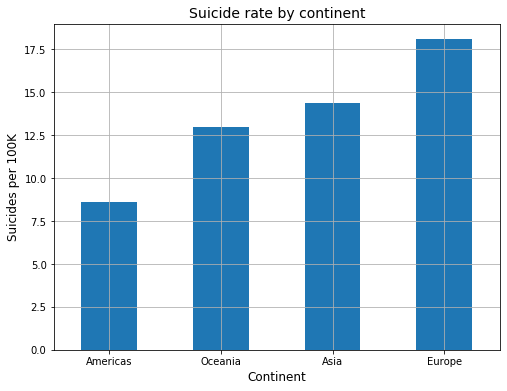

In [36]:
var = ['continent', 'suicides_no', 'population']
tot_sui_by_continent = continent_df.loc[:, var].groupby('continent').sum()
sui_rate_by_continent = tot_sui_by_continent['suicides_no'] / tot_sui_by_continent['population']
sui_rate_by_continent *= 10**5
ax = sui_rate_by_continent.sort_values().plot.bar(figsize=(8, 6), grid=True, rot=0);
ax.set_ylabel('Suicides per 100K', fontsize=12)
ax.set_xlabel('Continent', fontsize=12)
ax.set_title('Suicide rate by continent', fontsize=14);

#### Thể hiện tỉ lệ tự sát qua top 10 quốc gia có tỉ lệ tự sát cao nhất châu Âu

In [37]:
# Tính tỉ lệ tự sát của các quốc gia châu Âu
var = ['country', 'suicides_no', 'population']
europe_df = data[data['continent'] == 'Europe']
tot_sui_by_euro = europe_df.loc[:, var].groupby('country').sum()
sui_rate_by_euro = tot_sui_by_euro['suicides_no'] / tot_sui_by_euro['population']
sui_rate_by_euro *= 10**5

# Sắp xếp và lấy ra top 10 quốc gia châu Âu có tỉ lệ tự sát cao nhất
sui_rate_by_euro = sui_rate_by_euro.sort_values(ascending=False)[:10]


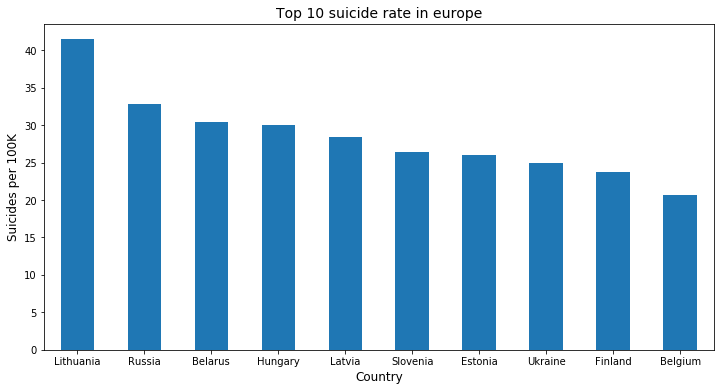

In [38]:
# Đổi 'Russian Federation' thành 'Russia' để dễ trực quan được gọn hơn
sui_rate_by_euro.rename(index={'Russian Federation':'Russia'}, inplace=True)

# Trực quan hóa bằng bar plot
ax = sui_rate_by_euro.plot.bar(figsize=(12, 6), rot=0);
ax.set_ylabel('Suicides per 100K', fontsize=12)
ax.set_xlabel('Country', fontsize=12)
ax.set_title('Top 10 suicide rate in europe', fontsize=14);

### Nhận xét:

- Châu Âu có tỉ lệ tự sát cao nhất thế giới (lớn hơn 17.5 / 100K dân).
- Trong top 10 quốc gia châu Âu có tỉ lệ tự sát cao nhất thì có tới 8 nước thuộc khu vực Đông Âu (top 1 đến top 8).

Từ những kết quả trên ta có thể suy đoán như sau:

- Châu Âu có độ tuổi trung bình cao nhất thế giới, như ta đã biết thì độ tuổi càng cao thì tỉ lệ tự sát càng cao, nên có thể đây là yếu tố khiến cho châu Âu lại có tỉ lệ tự sát cao nhất
- Tuy nhiên khi quan sát trên top 10 quốc gia châu Âu thì đa số (8/10) là các quốc gia Đông Âu, về độ tuổi trung bình thì các quốc gia Đông Âu không thuộc nhóm cao nhất. Điều này có thể là do văn hóa, chính sách của các quốc gia này. Vì phần lớn quốc gia Đông Âu đều được tách ra từ Liên Xô, có thể sau khi Liên Xô tan rã đã làm cho nền kinh tế của các quốc gia này trì trệ (những vấn đề về kinh tế cũng là một phần lý do dẫn đến suy nghĩ tự sát)

## Có quốc gia nào tỉ lệ tự sát đang tăng dần trong 20 năm gần đây (1995 - 2015) không?

### Phân tích và trả lời câu hỏi

Như đã đề cập ở mục 3.1, các vụ tự sát trên thế giới đang có xu hướng giảm dần từ năm 1995. Tuy nhiên ta vẫn chưa đi sâu vào từng quốc gia xem có trường hợp nào mà các biện pháp phòng tránh hiện thời vẫn chưa hoạt động hiệu quả hay không. Ngoài ra câu hỏi này cũng là tiền đề để trả lời cho câu hỏi ở mục sau.

Để trả lời câu hỏi này cần thực hiện các bước như sau:
- Bước 1: Taọ dataframe mới country_df gồm 3 cột country, year và suicide rate (num suicides / 100K pop) với year được lọc từ năm 1995 đến 2015
- Bước 2: Tính correlation giữa cột year và suicide rate và lưu vào corr series
- Bước 3: Chọn ra các quốc gia có correlation > 0

#### Bước 1: Tạo dataframe country_df

In [39]:
# Lọc ra năm 1995-2015
var = ['country', 'year', 'suicides_no', 'population']
tmp = data[(data['year'] >= 1995) & (data['year'] <= 2015)]

# Tính suicide rate
tmp = tmp.loc[:, var].groupby(['country', 'year']).sum()
country_series = tmp['suicides_no'] * 10**5 / tmp['population']

# Tạo 
country_series.name = 'suicide rate'
country_df = country_series.reset_index()
country_df

,country,year,suicide rate
0,Albania,1995,3.030929
1,Albania,1996,3.027005
2,Albania,1997,5.709871
3,Albania,1998,5.111694
4,Albania,1999,4.587913
...,...,...,...
1723,Uzbekistan,2010,5.707206
1724,Uzbekistan,2011,6.313022
1725,Uzbekistan,2012,6.955545
1726,Uzbekistan,2013,7.265567


#### Bước 2: Tính correlation giữa year và suicide rate cho mỗi quốc gia

In [51]:
country_df.groupby('country')[['year','suicide rate']].corr()

year  suicide rate
country                                                 
Albania             year          1.000000     -0.268235
                    suicide rate -0.268235      1.000000
Antigua and Barbuda year          1.000000     -0.200332
                    suicide rate -0.200332      1.000000
Argentina           year          1.000000      0.241830
...                                    ...           ...
United States       suicide rate  0.740238      1.000000
Uruguay             year          1.000000      0.548210
                    suicide rate  0.548210      1.000000
Uzbekistan          year          1.000000     -0.477464
                    suicide rate -0.477464      1.000000

[194 rows x 2 columns]

In [52]:
country_corr = country_df.groupby('country')[['year','suicide rate']].corr().iloc[0::2, -1]
country_corr = country_corr.droplevel(1)
country_corr

country
Albania                -0.268235
Antigua and Barbuda    -0.200332
Argentina               0.241830
Armenia                 0.066687
Aruba                  -0.359986
                          ...   
United Arab Emirates   -0.883831
United Kingdom         -0.022357
United States           0.740238
Uruguay                 0.548210
Uzbekistan             -0.477464
Name: suicide rate, Length: 97, dtype: float64

#### Bước 3: Chọn ra các quốc gia có correlation giữa year và suicide rate dương

In [55]:
country_corr[country_corr > 0].size

34

Top 10 quốc gia có correlation giữa year và suicide rate lớn

In [75]:
top_country_corr = country_corr[country_corr > 0].sort_values(ascending=False)[:20]
top_country_corr

country
Bosnia and Herzegovina    1.000000
Mexico                    0.962196
Philippines               0.940934
Brazil                    0.939307
Cyprus                    0.909730
Paraguay                  0.905780
Republic of Korea         0.900344
Suriname                  0.891425
South Africa              0.774170
Montenegro                0.768602
Guatemala                 0.760464
United States             0.740238
Guyana                    0.734042
Portugal                  0.724210
Chile                     0.714834
Greece                    0.657861
Turkey                    0.558553
Uruguay                   0.548210
Jamaica                   0.524472
Malta                     0.478798
Name: suicide rate, dtype: float64

Trong 101 quốc gia cung cấp dữ liệu thì có 34 quốc gia có tỉ lệ tự sát tăng dần. Để quan sát rõ hơn ta lựa chọn 4 quốc gia có correlation lớn nhất (và có đủ dữ liệu từ năm 1995 đến 2015 để trực quan hóa)

In [86]:
# Chọn ra các quốc gia có đủ dữ liệu từ năm 1995 đến 2015
tmp = country_df.groupby('country')['year'].count()
tmp = tmp[tmp == 21]

# Lấy ra các quốc gia nằm trong top_country_corr
tmp[top_country_corr.index].dropna()

country
Mexico               21.0
Brazil               21.0
Republic of Korea    21.0
Guatemala            21.0
United States        21.0
Chile                21.0
Greece               21.0
Malta                21.0
Name: year, dtype: float64

Ở đây ta lựa chọn 4 quốc gia: Mexico, Brazil, Republic of Korea và United States để quan sát

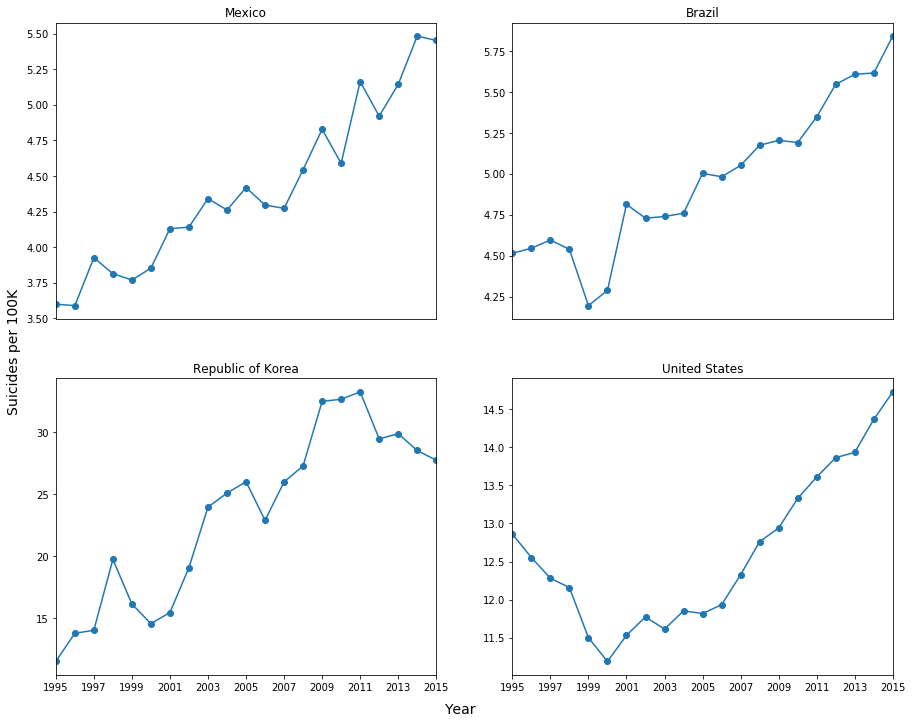

In [116]:
top_countries = ['Mexico', 'Brazil', 'Republic of Korea', 'United States']

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.text(0.08, 0.5, 'Suicides per 100K', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.08, 'Year', ha='center', fontsize=14)
i = 0
for var in top_countries:
    df = country_df[country_df['country'] == var]
    ax = df.drop('country', axis=1).set_index('year').plot.line(
        figsize=(15, 12), ax=axes[i // 2, i % 2], marker='o', legend=False)
    
    ax.set_title(var)
    ax.set_xlabel('')
    if i <= 1:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(1995, 2016, step=2))
    i += 1

### Nhận xét

Tuy rằng trong mục 3.1, nhìn chung thì thế giới có tỉ lệ tự sát giảm dần. Tuy nhiên vẫn còn đó một số quốc gia (khoảng 34 nước) thì tình trạng này vẫn chưa có dấu hiệu thuyên giảm. Đặc biệt nó đang tăng mạnh ở một quốc gia phát triển bậc nhất là nước Mỹ

## Các quốc gia càng giàu (GDP cao) thì tỉ lệ tự sát có ít hơn không?